In [ ]:
'''
Import packages and display settings
'''
## supress warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
## display settings
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 10000000)
pd.set_option('max_info_columns', 10000000)
import os
## Assign dataset path
path_data = 'C:/Users/Cody_Black/JupyterNotebook/Dataset'
os.chdir(path_data)
## Data viz lib
# %matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

In [2]:
df_A_Test = pd.read_excel(open('Babson Hackathon _ Exhibits A _ B.xlsx', 'rb'), sheet_name='Exhibit A | Test Results') 

In [3]:
## list of categorical variables in df_Supplier
category = ['clid', 'clname', 'clmkcid', 'mkcname']
# recast types
for col in category:
    df_A_Test[col] = df_A_Test[col].astype('category')

## EDA by using boxplot and violin plot

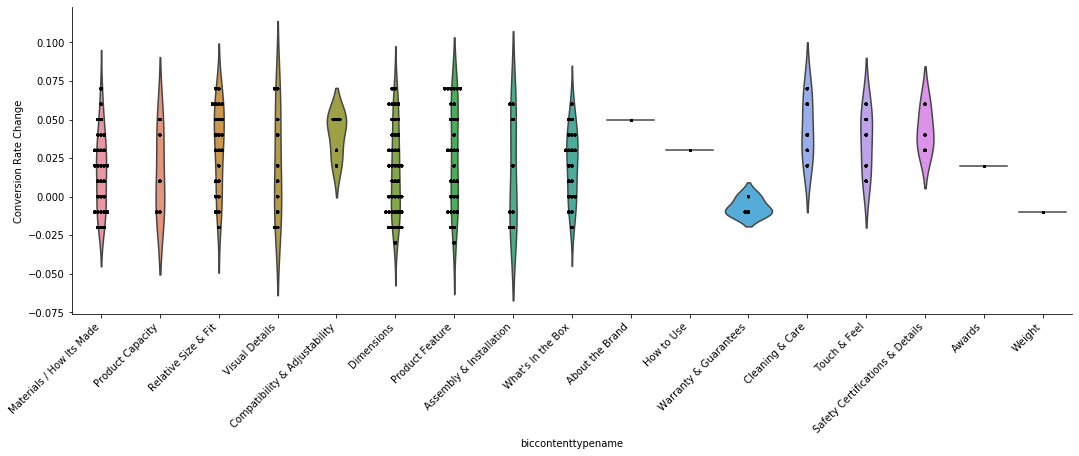

In [88]:
'''
Plot based on biccontenttypename and Conversion Rate Change

We can see that some of contents have dispersed distribution may be due to different classes they belong to
On the other hand, Warranty and Guarantees seems to have concentrated distribution and mainly
in negative region
'''
data = combinedDf
chart = sns.catplot(
    data=data,
    x='biccontenttypename',
    y='Conversion Rate Change',
    #row='clname',
    #hue='clname',
    kind='violin',
    height=5, # make the plot 5 units high
    aspect=3, #palette='Set1'
    #color='blue',
    inner=None,
    ) # height should be three times width
for ax in chart.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
        sns.swarmplot(x="biccontenttypename", y="Conversion Rate Change", 
              color="k", size=3, 
              data=data, ax=ax);


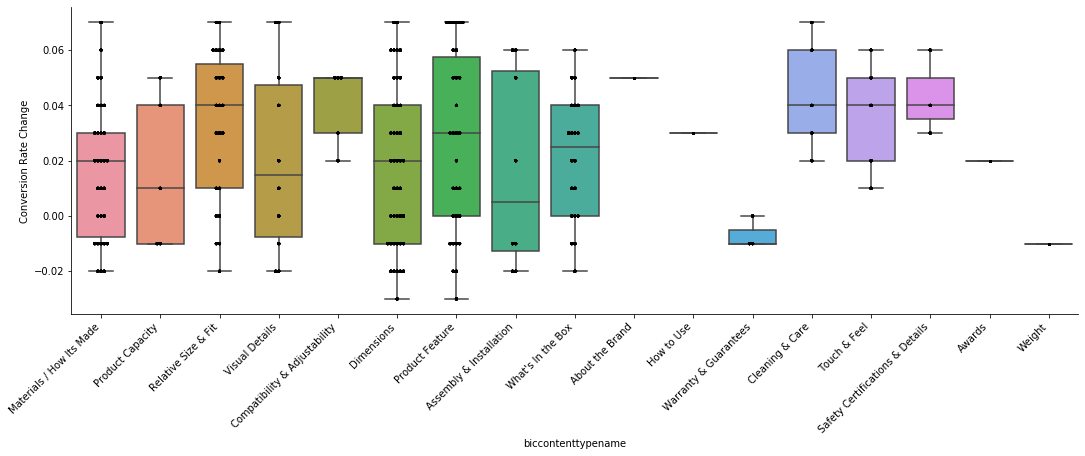

In [87]:
'''
Same plot but using boxplot
'''

data = combinedDf
chart = sns.catplot(
    data=data,
    x='biccontenttypename',
    y='Conversion Rate Change',
    #row='clname',
    #hue='clname',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3, #palette='Set1'
    #color='blue',
    #inner=None,
    ) # height should be three times width
for ax in chart.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
        sns.swarmplot(x="biccontenttypename", y="Conversion Rate Change", 
              color="k", size=3, 
              data=data, ax=ax);

## Using Kmode to do cluster analysis

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 668.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 614.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 576.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 548.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 535.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 517.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves:

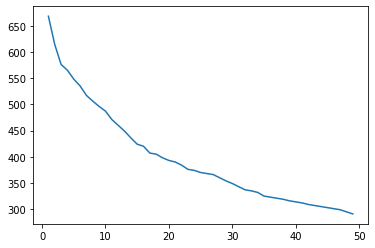

In [46]:
'''
Identify best k
'''

# !pip install kmodes
from kmodes.kmodes import KModes

# Choosing K by comparing Cost against each K
cost = []
num = 50
for num_clusters in list(range(1,num)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_A_Test.drop(columns=['clid', 'mkcname']))
    cost.append(kmode.cost_)
    
y = np.array([i for i in range(1,num)])
plt.plot(y,cost)

In [56]:
'''
Choose best k, predict cluster for the chosen DataFrame, and combine the result
to combinedDf
'''

# Choosing k
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_A_Test)

# Combining the predicted clusters with the original DF.

clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_A_Test, clustersDf], axis = 1).reset_index()
# combinedDf
combinedDf = combinedDf.drop(['index'], axis = 1) # , 'level_0'

# combinedDf.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 847.0


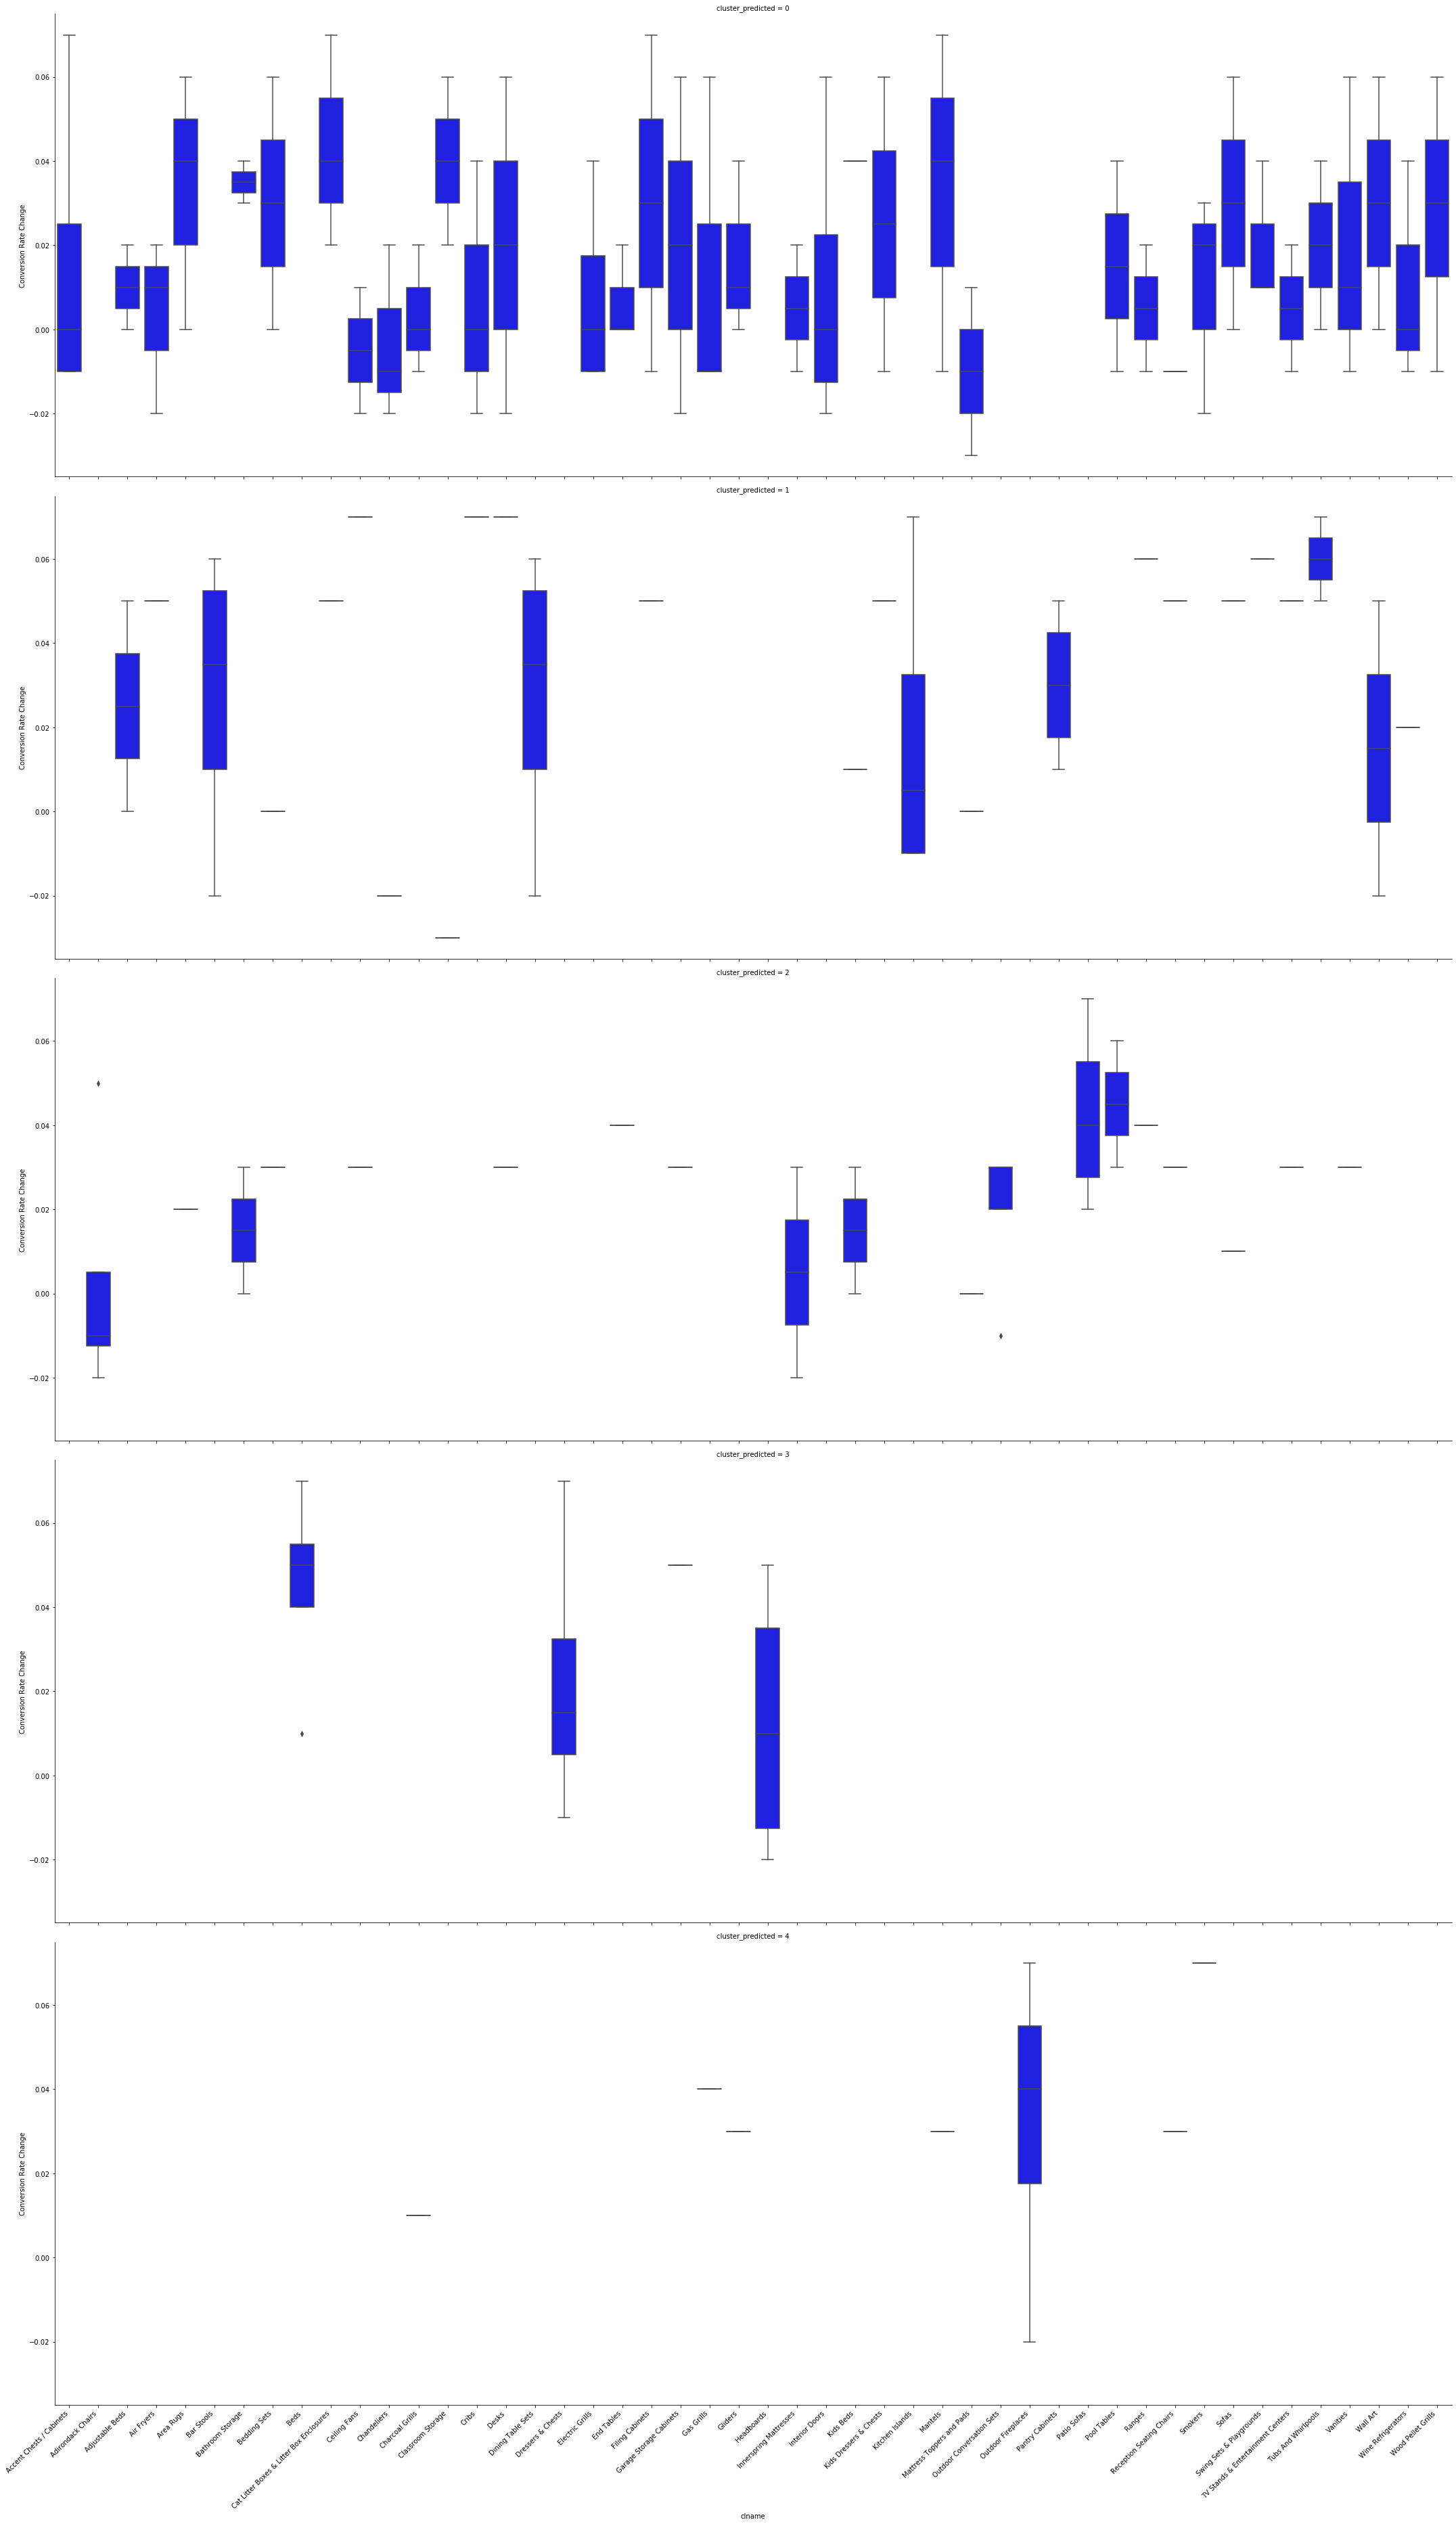

In [57]:
'''
Plot clusters based on class name and Conversion Rate Change
'''
data = combinedDf
chart = sns.catplot(
    data=data,
    x='clname',
    y='Conversion Rate Change',
    row='cluster_predicted',
    #hue='',
    kind='box',
    height=10, # make the plot 5 units high
    aspect=3, #palette='Set1'
    color='blue',
    ); # height should be three times width
for ax in chart.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
plt.show()   

In [17]:
# Cluster Identification

cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
# cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
# cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_0.head()

,clid,clname,biccontenttypename,Conversion Rate Change,clmkcid,mkcname,cluster_predicted
156,6173,Gas Grills,Dimensions,-0.01,8,Fireplaces & Grills,0
157,6173,Gas Grills,Materials / How Its Made,-0.01,8,Fireplaces & Grills,0
158,6173,Gas Grills,Product Feature,0.04,8,Fireplaces & Grills,0
159,6173,Gas Grills,What's In the Box,0.06,8,Fireplaces & Grills,0
180,7305,Charcoal Grills,Dimensions,-0.01,8,Fireplaces & Grills,0
